# Classification

* We'll start by importing the dataset from the csv's
* Do some basic analysis on the dataset
* Find the target column, check for nulls, understand the variance in features
* Do `Exploratory data analysis (EDA)` on the dataset to see how the target varies with each feature
* Perhaps find outliers, do scaling if needed, and convert categorical features to numerical ones.
* Then we train a classifier
* Evaluate its performance with standard metrics like `confusion-matrix`, `precision`, `recall`, `roc_auc curve` or `f1-score`
* Finally derive a conclusion or iterate the same process with another model

In [1]:
# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [2]:
X_train = pd.read_csv('datasets/train.csv', header=None)
X_test = pd.read_csv('datasets/test.csv', header=None)

In [3]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,-47,0,-5,-27,-11,-19,-2,-33,37,0,...,0,2,-4,-3,4,-23,-68,15,C,0
1,1,1,-2,-3,-1,-3,39,10,0,-1,...,-7,-2,1,6,-2,4,22,2,C,0
2,1,-4,-2,-6,-20,20,-1,-3,20,3,...,14,2,-2,0,23,21,-3,22,A,1
3,10,2,1,-7,-8,12,41,21,-14,3,...,2,1,2,-2,-8,-29,29,7,C,0
4,1,-3,-2,-6,1,0,10,-6,4,0,...,5,0,-3,-8,-11,-2,19,4,C,0


In [4]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,-47,0,-5,-27,-11.0,-19.0,-2.0,-33.0,37,0,...,0,2,-4,-3,4,-23,-68,15,A,0
1,1,1,-2,-3,-1.0,-3.0,39.0,10.0,0,-1,...,-7,-2,1,6,-2,4,22,2,C,0
2,1,-4,-2,-6,-20.0,20.0,-1.0,-3.0,20,3,...,14,2,-2,0,23,21,-3,22,B,1
3,10,2,1,-7,-8.0,12.0,41.0,21.0,-14,3,...,2,1,2,-2,-8,-29,29,7,B,0
4,1,-3,-2,-6,1.0,0.0,10.0,-6.0,4,0,...,5,0,-3,-8,-11,-2,19,4,C,0


In [5]:
y_train, y_test = X_train[65], X_test[65]

In [6]:
X_train = X_train.drop(65, 1)
X_test = X_test.drop(65, 1)

In [7]:
print("""
Train has {} instances and {} features
Test has {} instances and {} features
""".format(X_train.shape[0], X_train.shape[1], X_test.shape[0], X_test.shape[1]))


Train has 8678 instances and 65 features
Test has 3000 instances and 65 features



#### Let' s check if we have any null values

In [23]:
print("""
Train set has {} null values
Test set has {} null values.""".format(X_train.isnull().values.sum(), X_test.isnull().values.sum()))


Train set has 0 null values
Test set has 12 null values.


#### Ok. So now let's check column wise distribution of null values.

In [32]:
X_test.isna().sum().values

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

* Below is a basic template to plot a barplot of the frequency distribution of a categorical feature using the seaborn package
* which shows the frequency distribution of the carrier column. 
* We can play with different arguments to change the look of the plot.

In [64]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
category_count = X_train[64].value_counts()
sns.set(style="darkgrid")
sns.barplot(category_count.index, category_count.values, alpha=0.9)
plt.title('Frequency Distribution of Categories')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()

KeyError: 64

We observe that all the four categories have near about the same frequency across the dataset.

#### Convert categorecial to numerical values

In [65]:
X_train = pd.get_dummies(X_train, columns=[64], prefix = ['category'])
X_test = pd.get_dummies(X_test, columns=[64], prefix = ['category'])

KeyError: "None of [Int64Index([64], dtype='int64')] are in the [columns]"

In [66]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,category_A,category_B,category_C,category_D
0,-47,0,-5,-27,-11,-19,-2,-33,37,0,...,-4,-3,4,-23,-68,15,0,0,1,0
1,1,1,-2,-3,-1,-3,39,10,0,-1,...,1,6,-2,4,22,2,0,0,1,0
2,1,-4,-2,-6,-20,20,-1,-3,20,3,...,-2,0,23,21,-3,22,1,0,0,0
3,10,2,1,-7,-8,12,41,21,-14,3,...,2,-2,-8,-29,29,7,0,0,1,0
4,1,-3,-2,-6,1,0,10,-6,4,0,...,-3,-8,-11,-2,19,4,0,0,1,0


In [67]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,category_A,category_B,category_C,category_D
0,-47,0,-5,-27,-11.0,-19.0,-2.0,-33.0,37,0,...,-4,-3,4,-23,-68,15,1,0,0,0
1,1,1,-2,-3,-1.0,-3.0,39.0,10.0,0,-1,...,1,6,-2,4,22,2,0,0,1,0
2,1,-4,-2,-6,-20.0,20.0,-1.0,-3.0,20,3,...,-2,0,23,21,-3,22,0,1,0,0
3,10,2,1,-7,-8.0,12.0,41.0,21.0,-14,3,...,2,-2,-8,-29,29,7,0,1,0,0
4,1,-3,-2,-6,1.0,0.0,10.0,-6.0,4,0,...,-3,-8,-11,-2,19,4,0,0,1,0


In [68]:
# shuffle_index = np.random.permutation(8678)
# X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [55]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

*Evaluate our model using cross_val_score()*

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are l

array([0.9502 , 0.96565, 0.96495])

*Dumb classifier for not-5 class*

In [61]:
from sklearn.base import BaseEstimator

In [62]:
class Never5Classifier(BaseEstimator):
    
    def fit(self, X, y=None):
        pass

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [63]:
# let's try out the accuracy of our dumb classifier
never_5_clf = Never5Classifier()


In [64]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.909  , 0.90715, 0.9128 ])

*Confusion Matrix*

In [65]:
from sklearn.model_selection import cross_val_predict

In [66]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are l

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
confusion_matrix(y_train_5, y_train_pred)

array([[53272,  1307],
       [ 1077,  4344]])

In [69]:
# ideal confusion matrix has non-zero elements only in the diagnol like this...
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]])

*Let's find out the precision and recall*

In [70]:
from sklearn.metrics import precision_score, recall_score

In [71]:
precision_score(y_train_5, y_train_pred)

0.7687135020350381

In [72]:
recall_score(y_train_5, y_train_pred)

0.801328168234643

In [73]:
from sklearn.metrics import f1_score

In [74]:
print("Veer the F1 score is = ", f1_score(y_train_5, y_train_pred))

Veer the F1 score is =  0.7846820809248555


In [75]:
y_scores = sgd_clf.decision_function([some_digit])

In [76]:
y_scores

array([161855.74572176])

In [77]:
threshold = 0

y_some_digit_pred = (y_scores > threshold)

y_some_digit_pred

array([ True])

In [78]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [79]:


y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method="decision_function")

/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are l

In [80]:
y_scores

array([ -434076.49813641, -1825667.15281624,  -767086.76186905, ...,
        -867191.25267994,  -565357.11420164,  -366599.16018198])

In [81]:
from sklearn.metrics import precision_recall_curve

In [82]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [83]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    

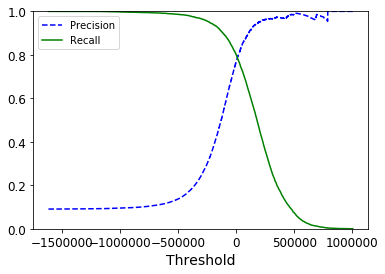

In [84]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

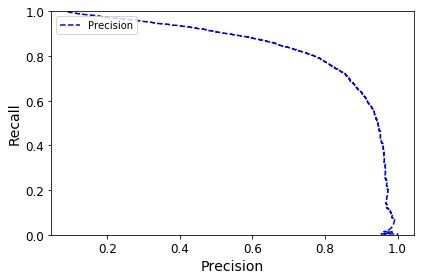

In [85]:
plt.plot(precisions, recalls, "b--", label="Precision")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.tight_layout()
plt.show()


In [86]:
y_train_pred_90 = (y_scores > 70000)

In [87]:
precision_score(y_train_5, y_train_pred_90)

0.8659205116491548

In [88]:
recall_score(y_train_5, y_train_pred_90)

0.6993174691016417

If someone says “let’s reach 99% precision,” you should ask, “at what recall?”

In [89]:
from sklearn.metrics import roc_curve

In [90]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
# fpr = false positive rate = (1 - true negative rate)
# tpr = true positive rate

In [91]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    

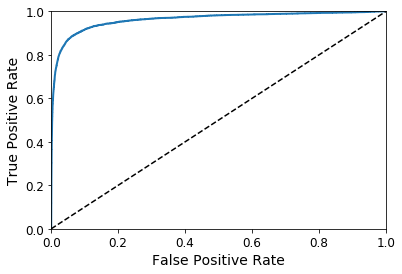

In [92]:
plot_roc_curve(fpr, tpr, "Roc Curve")
plt.show()

In [93]:
from sklearn.metrics import roc_auc_score

In [94]:
roc_auc_score(y_train_5, y_scores)

0.9624496555967156

### Random Forest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

forest_clf = RandomForestClassifier(random_state=42)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3, method="predict_proba")
y_probas_forest

C:\Users\gurupratap.matharu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gurupratap.matharu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gurupratap.matharu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]])

In [78]:
y_scores_forest = y_probas_forest[:, 1] # select 1'st column as scores as it is the probability 
# of the positive class

In [79]:
y_scores_forest

array([0., 0., 1., ..., 0., 0., 0.])

In [101]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

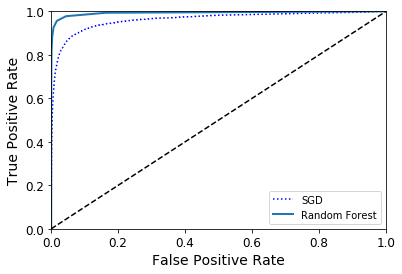

In [102]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [103]:
roc_auc_score(y_train_5, y_scores_forest)

0.9931243366003829

MultiClass Classification

In [104]:
sgd_clf.fit(X_train, y_train)

/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [105]:
sgd_clf.predict([some_digit])

array([5.])

In [106]:
some_digit_scores = sgd_clf.decision_function([some_digit])

In [107]:
some_digit_scores

array([[-311402.62954431, -363517.28355739, -446449.5306454 ,
        -183226.61023518, -414337.15339485,  161855.74572176,
        -452576.39616343, -471957.14962573, -518542.33997148,
        -536774.63961222]])

In [108]:
np.argmax(some_digit_scores)

5

In [109]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [110]:
sgd_clf.classes_[5]

5.0

*Forcefully making One Vs One classifiers*

In [111]:
from sklearn.multiclass import OneVsOneClassifier

In [112]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

In [113]:
ovo_clf.fit(X_train, y_train)

/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are l

/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are l

/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
          n_jobs=None)

In [114]:
ovo_clf.predict([some_digit])

array([5.])

In [115]:
len(ovo_clf.estimators_)

45

In [116]:
forest_clf.fit(X_train, y_train)


forest_clf.predict([some_digit])

/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([5.])

In [117]:
forest_clf.predict_proba([some_digit])

array([[0.1, 0. , 0. , 0.1, 0. , 0.8, 0. , 0. , 0. , 0. ]])

We evaluate SGDClassifier's accuracy using cross_val_score()

In [118]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are l

array([0.84063187, 0.84899245, 0.86652998])

We scale the inputs to improve the accuracy of our SGD classifier

In [119]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [120]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are l

array([0.91011798, 0.90874544, 0.906636  ])

*Error Analysis*
To find the kinds of errors our model makes we analyze the confusion matrix

In [121]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/gurupratap/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are l

In [122]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [123]:
conf_mx

array([[5725,    3,   24,    9,   10,   49,   50,   10,   39,    4],
       [   2, 6493,   43,   25,    7,   40,    5,   10,  109,    8],
       [  51,   41, 5321,  104,   89,   26,   87,   60,  166,   13],
       [  47,   46,  141, 5342,    1,  231,   40,   50,  141,   92],
       [  19,   29,   41,   10, 5366,    9,   56,   37,   86,  189],
       [  73,   45,   36,  193,   64, 4582,  111,   30,  193,   94],
       [  29,   34,   44,    2,   42,   85, 5627,   10,   45,    0],
       [  25,   24,   74,   32,   54,   12,    6, 5787,   15,  236],
       [  52,  161,   73,  156,   10,  163,   61,   25, 5027,  123],
       [  43,   35,   26,   92,  178,   28,    2,  223,   82, 5240]])

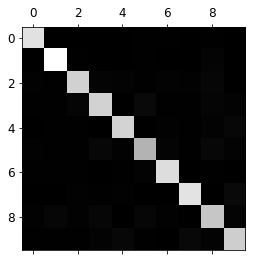

In [124]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

# the more gray the higher the error

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)

norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)

from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=200, facecolor='w', edgecolor='k')

plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
cl_a, cl_b = 3, 5

In [ ]:
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

In [ ]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

The two 5X5 blocks on the left show digits classified as 3s and the two 5X5 blocks on the right show images classified as 5s.

### Multilabel Classification

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

knn_clf = KNeighborsClassifier()
# train the classifier
knn_clf.fit(X_train, y_train)
# generate predictions
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
# calculate f1 score
f1_score(y_train, y_train_knn_pred, average="macro")

0.6237872717710338